<a href="https://colab.research.google.com/github/ifrahsaleem/Bioinformatic/blob/master/Hydropathy_Plot_AA_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2: Calculating Amino Acid Frequencies**

In [0]:
from google.colab import drive
drive.mount('/content/drive/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
file = open("drive/My Drive/rhodopsin.txt", "r")

#Due to device issues, Fasta file could not be downloaded in my laptop as shown to you during the first Lab, where you allowed me to use a txt file. 

read_file = file.read()
print(read_file)
list_file = read_file.split()
print(list_file)




>sp|P08100|OPSD_HUMAN Rhodopsin OS=Homo sapiens OX=9606 GN=RHO PE=1 SV=1
MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLY
VTVQHKKLRTPLNYILLNLAVADLFMVLGGFTSTLYTSLHGYFVFGPTGCNLEGFFATLG
GEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLAGWSRYIP
EGLQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIIIFFCYGQLVFTVKEAAAQQQES
ATTQKAEKEVTRMVIIMVIAFLICWVPYASVAFYIFTHQGSNFGPIFMTIPAFFAKSAAI
YNPVIYIMMNKQFRNCMLTTICCGKNPLGDDEASATVSKTETSQVAPA
['>sp|P08100|OPSD_HUMAN', 'Rhodopsin', 'OS=Homo', 'sapiens', 'OX=9606', 'GN=RHO', 'PE=1', 'SV=1', 'MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLY', 'VTVQHKKLRTPLNYILLNLAVADLFMVLGGFTSTLYTSLHGYFVFGPTGCNLEGFFATLG', 'GEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLAGWSRYIP', 'EGLQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIIIFFCYGQLVFTVKEAAAQQQES', 'ATTQKAEKEVTRMVIIMVIAFLICWVPYASVAFYIFTHQGSNFGPIFMTIPAFFAKSAAI', 'YNPVIYIMMNKQFRNCMLTTICCGKNPLGDDEASATVSKTETSQVAPA']


Most occurring amino acid is A.
Least occurring amino acid is D.
Amino acid list (in descending order):  ['A', 'F', 'V', 'L', 'T', 'I', 'G', 'P', 'Y', 'S', 'N', 'E', 'M', 'Q', 'K', 'C', 'R', 'W', 'H', 'D']
Corresponding frequency list (in descending order):  [9.2, 8.62, 8.62, 8.33, 6.9, 6.9, 6.32, 5.75, 5.46, 4.89, 4.6, 4.6, 4.31, 3.45, 3.16, 2.87, 2.01, 1.44, 1.44, 1.15]
Following is the dictionary where key is the Amino Acid name, and its value is the frequency: [('A', '9.20'), ('F', '8.62'), ('V', '8.62'), ('L', '8.33'), ('T', '6.90'), ('I', '6.90'), ('G', '6.32'), ('P', '5.75'), ('Y', '5.46'), ('S', '4.89'), ('N', '4.60'), ('E', '4.60'), ('M', '4.31'), ('Q', '3.45'), ('K', '3.16'), ('C', '2.87'), ('R', '2.01'), ('W', '1.44'), ('H', '1.44'), ('D', '1.15')]


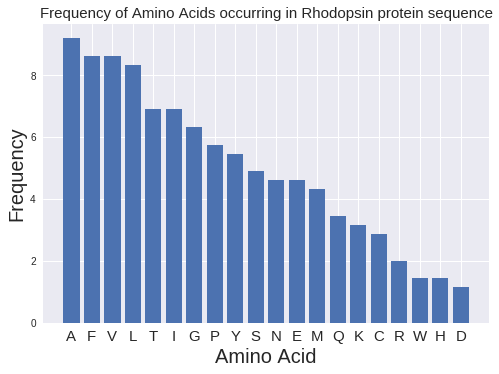

In [0]:
frequency_count = {}

sequence = []
for x in range(8, len(list_file)):
  sequence += list_file[x]

for x in sequence:
  if x in frequency_count:
    frequency_count[x] += 1
  else:
    frequency_count[x] = 1

freqs_list = list(frequency_count.values())

total_AA = sum(freqs_list)


AA_freq_list = []
AA_name_list = []
for keys,value in frequency_count.items():
    AA_freq = "%.2f" % ((value / total_AA) * 100)
    AA_freq_list.append(AA_freq)
    AA_name_list.append(keys)


with open("drive/My Drive/P08100_aaCount.txt", "w") as new_file:
  for keys,value in frequency_count.items():
    AA_freq = "%.2f" % ((value / total_AA) * 100)
    new_file.write("{aa}\t{freq}\n".format(aa=keys,freq=AA_freq))
  
def keywithmaxval(d,e):
  maxfreq = max(AA_freq_list)
  maxindex = AA_freq_list.index(maxfreq)
  maxAA = AA_name_list[maxindex]
  return maxAA

def keywithminval(d,e):
  minfreq = min(AA_freq_list)
  minindex = AA_freq_list.index(minfreq)
  minAA = AA_name_list[minindex]
  return minAA

maxAA = keywithmaxval(AA_freq_list, AA_name_list)
print("Most occurring amino acid is ", maxAA , ".", sep="")

minAA = keywithminval(AA_freq_list, AA_name_list)
print("Least occurring amino acid is ", minAA  , ".", sep="")

new_dict = {}
for x in range(20):
  key = AA_name_list[x]
  value = AA_freq_list[x]
  new_dict[key] = value

  
import matplotlib
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np

result =sorted(new_dict.items() , key = lambda t : t[1] , reverse = True)

amino_acid = []
frequency = []
for k , v  in result:
  amino_acid += k
  frequency.append(v)
  
frequency = list(map(float, frequency))
print('Amino acid list (in descending order): ' , amino_acid)
print('Corresponding frequency list (in descending order): ' , frequency)

print('Following is the dictionary where key is the Amino Acid name, and its value is the frequency:', result)

#fig = plt.figure()
index = np.arange(len(amino_acid))
#rint(index)
#rint(frequency)

plt.xlabel('Amino Acid', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.bar(index , frequency)
plt.xticks(index, amino_acid, fontsize=15, rotation=0)

plt.title('Frequency of Amino Acids occurring in Rhodopsin protein sequence', fontsize = 15)
plt.show()
#fig.savefig('aaa.pdf')

#display aaa.pdf 

file.close()
new_file.close()
 

**Part 3: Plotting an Hydropathy Plot**

Enter the window size: 20


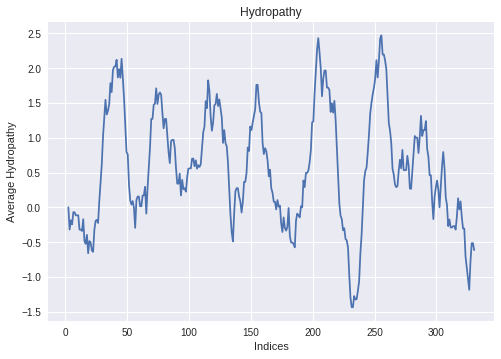

In [0]:
#one_letter_code = ['I,' 'V', 'L', 'F', 'C', 'M', 'A', 'G', 'T', 'W', 'S', 'Y', 'P', 'H', 'E', 'Q', 'D', 'N', 'K', 'R']
hydrophobicity_value = {'I' : 4.5, 'V' : 4.2, 'L' : 3.8, 'F' : 2.8,'C' : 2.5, 'M' : 1.9, 'A': 1.8, 'G' : -0.4, 'T' : -0.7, 'W' : -0.9, 'S' : -0.8, 'Y' : -1.3,\
                         'P' : -1.6, 'H' : -3.2, 'E' : -3.5, 'Q' : -3.5, 'D' : -3.5, 'N' : -3.5, 'K' : -3.9, 'R' : -4.5}
AA_sequence = 'MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVLGGFTSTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLAGWSRYIPEGLQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIIIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWVPYASVAFYIFTHQGSNFGPIFMTIPAFFAKSAAIYNPVIYIMMNKQFRNCMLTTICCGKNPLGDDEASATVSKTETSQVAPA'

# = input("Enter protein sequence:")
window_size = int(input("Enter the window size: "))

AA_sequence_list = []
for x in AA_sequence:
  AA_sequence_list.append(x)
#print(AA_sequence_list)
average_list = []
ind_list = []
sublist = []
count = float((len(sublist)+1) / 2) + 1.0
for i in range(0, len(AA_sequence_list)):
  sliding_window = (AA_sequence_list[i : i+window_size])
  #print(sliding_window) 
  sublist = []
  for x in range(len(sliding_window)):
    AA = sliding_window[x]
    value = float(hydrophobicity_value[AA])
    sublist.append(value)     
   
    while len(sublist) == window_size:
      SUM = sum(sublist)
      average = SUM / len(sublist)
      average_list.append(average)
      #ind = float((len(sublist)+1) / 2)
      #print(ind)
      count += 1
      #print(ind)
      #print(count)
      #print(count)
      #print(count)
      ind_list.append(count)
      sublist.clear()
#print(count)
#print(len(ind_list))
#rint((average_list))

import matplotlib
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
  
plt.title('Hydropathy')
plt.plot(ind_list, average_list)
plt.xlabel('Indices')
plt.ylabel('Average Hydropathy')




plt.show()
  




  
  